## Milestone 4:

- Please address the comments in your report

- Add a figure to illustrate your complete process from data generation to centrality measurement, binarization, balancing, etc...

- Provide your results. I added all four of you to Redhawk. Here is some guidance on how to use a cluster set-up in the manner of Redhawk: https://hpcc.usc.edu/support/documentation/running-a-job-on-the-hpcc-cluster-using-pbs/
(There is also Redhawk-specific guidance here https://blogs.miamioh.edu/researchcomputing/hpc-cluster/batch/)
It is very extremely much much important that you read this guidance before you use the cluster. A cluster consists of a "head node" through which users log in, and compute nodes to do operations. By following the guidance, you will perform computations on the compute nodes (fast results, much happiness). If you ignore it, you may be spawning a task on the head node: it isn't ready for that, and it can bring the whole cluster to a halt (users can't access). I've had several students ignore the guidance and compromise the cluster already, which makes the cluster staff very unhappy about it. So the less we trash their cluster, the more likely we are to keep our access to it...

- Add a "literature survey" subsection (in the background) of about 2 pages single line spacing. The objective of this section is to familiarize yourself with what's already been done in the topic; to convey it to the reader; and to use this information to better frame your own work. Here are a few relevant papers:
https://academic.oup.com/comnet/article/1/1/44/509398
https://www.sciencedirect.com/science/article/abs/pii/S1476945X07000189
http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.169.2216&rep=rep1&type=pdf
https://iopscience.iop.org/article/10.1088/1742-5468/2011/11/P11018/meta
https://link.springer.com/article/10.1140/epjb/e2015-50671-y
https://ieeexplore.ieee.org/abstract/document/6713749
https://arxiv.org/abs/1908.08429
https://www.sciencedirect.com/science/article/abs/pii/S0378873316303690
https://link.springer.com/chapter/10.1007/978-3-319-18503-3_2
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6660088/
There are 4 of you hence I would expect a total of 8 papers to be mentioned. The eight can come from the list above or additional ones that you have found (but in this case I'd prefer to confirm with you first). For each paper you read, please highlight/annotate the PDF as you see fit and submit these edited PDFs. Seeing how you're doing this will allow me to identify any potential issue in your process and hence to give you more process-oriented feedback, rather than just seeing a summary and wondering how you got there.

There will also be a very short reflection to fill out online. The link will be sent later. The objective is to think of what you've learned so far, and highlight any area of interest for the last milestone.



<strong> A lot of the cells in this notebook will be from milestone 3. Any new work that we have done for milestone 4 will be annotated by a comment at the top of the cell or by a header before a new section (all new cells are in Part 3: Model Generation).</strong>

# Part 1: Data Generation

The five centralities that we will examine first are degree centrality, closeness centrality, betweeness centrality, load flow centrality, and reaching centrality. All of the data for all of the graphs will be loaded into data.csv.

In [1]:
import pandas as pd
import numpy as np
import networkx as nx

In [2]:
def get_degrees(G):
    deg = nx.degree_centrality(G)
    deg_df = pd.Series(deg).to_frame()
    deg_df.columns = ['Degree']
    deg_df['degree_rank'] = deg_df['Degree'].rank(method = 'min', ascending = False)
    return deg_df

In [3]:
def get_closeness(G):
    deg = nx.closeness_centrality(G)
    deg_df = pd.Series(deg).to_frame()
    deg_df.columns = ['Closeness']
    deg_df['closeness_rank'] = deg_df['Closeness'].rank(method = 'min', ascending = False)
    return deg_df

In [4]:
def get_betweeness(G):
    deg = nx.betweenness_centrality(G)
    deg_df = pd.Series(deg).to_frame()
    deg_df.columns = ['Betweeness']
    deg_df['betweeness_rank'] = deg_df['Betweeness'].rank(method = 'min', ascending = False)
    return deg_df

In [5]:
def get_load_flow(G):
    deg = nx.load_centrality(G)
    deg_df = pd.Series(deg).to_frame()
    deg_df.columns = ['Load']
    deg_df['load_rank'] = deg_df['Load'].rank(method = 'min', ascending = False)
    return deg_df

In [6]:
#MILESTONE 3 - Fixed the copy/paste error from milestone 2

def get_local_reaching(G):
    deg = {}
    for x in range(len(G)): # compute local reach centrality for each node in G
        deg[x] = nx.local_reaching_centrality(G, x)
    deg_df = pd.Series(deg).to_frame()
    deg_df.columns = ['Reaching']
    deg_df['reach_rank'] = deg_df['Reaching'].rank(method = 'min', ascending = False)
    return deg_df

In [7]:
# This is the first new centrality measurement

def get_harmonic(G):
    deg = nx.harmonic_centrality(G)
    deg_df = pd.Series(deg).to_frame()
    deg_df.columns = ['Harmonic']
    deg_df['harmonic_rank'] = deg_df['Harmonic'].rank(method = 'min', ascending = False)
    return deg_df

In [8]:
# This is the second centrality measurement

def get_page_rank(G):
    deg = nx.pagerank_scipy(G)
    deg_df = pd.Series(deg).to_frame()
    deg_df.columns = ['Page']
    deg_df['page_rank'] = deg_df['Page'].rank(method = 'min', ascending = False)
    return deg_df

Networks and Parameters:

|Network Types | Parameter(s) |
|--------------|--------------|
|scale-free| {size : How many nodes to generate} |
|small-world | {size : How many nodes to generate, k : k nearest neighbor in a ring, p : probability of rewiring each edge}|
|random | {size : How many nodes to generate, n : number of edges}|
|scale-free & small-world |{size : How many nodes to generate, m : number of random edges for each node, p : probability of rewiring each edge} |

In [9]:
# changed inner-most range to (1,51) to produce 50 networks for each size and type (a 100% increase)
# added support for the 2 new centrality measures- harmonics and pageRanks

# remove the following safety line to generate new data(running this cell will CLEAR all data, takes ~40 mins to replace)
return "This is a safety line!"

with open('data.csv', 'w') as wr:
    # Write the column headers to csv
    wr.write('networkType,networkSize,instanceNumber,nodeNumber,degreeRank,closenessRank,betweennessRank,loadRank,reachRank,harmonicRank,pageRank\n')
    networkTypes = ['scale-free', 'small-world', 'random', 'small-world/scale-free'] # networks to add
    sizes = [100, 200, 400, 800] # Sizes to add
    G = nx.scale_free_graph(100) # Initialization of the graph so the scope of the variable is outside the loops
    
    for netType in networkTypes: # for each network type
        for size in sizes:
            for instNum in range(1, 51): # generate 50 networks for each size and each network type
                if netType == 'scale-free':
                    G = nx.scale_free_graph(size)
                elif netType == 'small-world':
                    G = nx.watts_strogatz_graph(size, 10, 0.5)
                elif netType == 'small-world/scale-free':
                    G = nx.powerlaw_cluster_graph(size, 10, 0.5)
                else:
                    G = nx.gnm_random_graph(size, size * 4)
                degree_list = get_degrees(G)
                closeness_list = get_closeness(G)
                betweeness_list = get_betweeness(G)
                load_list = get_load_flow(G)
                reach_list = get_local_reaching(G)
                harmonic_list = get_harmonic(G)
                page_list = get_page_rank(G)
                
                for node in G.nodes(): # record network properties in csv file
                    wr.write(netType + ',' + str(size)+ ',' + str(instNum) + ',')
                    wr.write(str(node) + ',' + str(degree_list['degree_rank'][node]) + ',')
                    wr.write(str(closeness_list['closeness_rank'][node]) + ',')
                    wr.write(str(betweeness_list['betweeness_rank'][node]) + ',')
                    wr.write(str(load_list['load_rank'][node]) + ',')
                    wr.write(str(reach_list['reach_rank'][node]) + ',')
                    wr.write(str(harmonic_list['harmonic_rank'][node]) + ',')
                    wr.write(str(page_list['page_rank'][node]) + '\n')
            print('Finished size: ' + str(size))
                    

SyntaxError: 'return' outside function (<ipython-input-9-397fdb582d2c>, line 5)

In milestone 1, we failed to correctly generate a network that had both the properties of a scale-free & small-world network. After doing research, we came across this research paper: https://www.uvm.edu/pdodds/files/papers/others/2002/holme2002a.pdf . These researchers were able to generate a network that had both of the network properties. Networkx has a function implemented that will generate a random graph with this algorithm and it is demonstrated below.

In [10]:
G = nx.powerlaw_cluster_graph(100, 3, 0.5)

/Users/Alex/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


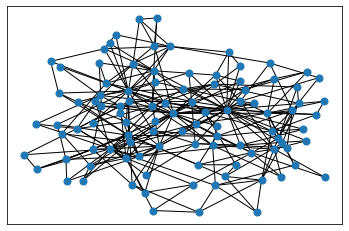

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, with_labels=False, node_size=50)

### Demonstrating that the powerlaw_cluster_graph is in fact a Scale-Free Small-World Network:

<strong> Showing high average clustering:</strong><br>

Within the networkx library, there is a function that will calculate the average clustering. We will compare this value with the values of small-world  graphs to show that it closely resembles the small-world clustering.

In [12]:
from statistics import mean

swsf_clusters = []
sw_clusters = []
for n in range(100):    
    swsf_graph = nx.powerlaw_cluster_graph(100, 10, 0.5)
    swsf_clusters.append(nx.average_clustering(swsf_graph))
    sw_graph = nx.watts_strogatz_graph(100, 10, 0.5)
    sw_clusters.append(nx.average_clustering(sw_graph))
    
print("The average clustering for SF-SW: ", mean(swsf_clusters))
print("The average clustering for SW:    ", mean(sw_clusters))

The average clustering for SF-SW:  0.34261955685169376
The average clustering for SW:     0.15123125124101897


As you can see from gathering the average clustering for the scale-free small-world network is actually higher than the watts-strogatz graph so the powerlaw_cluster_graph does have the property of high average clustering.<br><br>
<strong> Showing low average distance:</strong><br><br>
Within the networkx library, there is a function that will calculate the average shortest_path_length. This is a property of the small-world network we will show how the powerlaw_cluster_graph resembles this property.

In [13]:
swsf_dist = []
sw_dist = []
for n in range(100):    
    swsf_graph = nx.powerlaw_cluster_graph(100, 10, 0.5)
    sw_graph = nx.watts_strogatz_graph(100, 10, 0.5)
    swsf_dist.append(nx.average_shortest_path_length(swsf_graph))
    sw_dist.append(nx.average_shortest_path_length(sw_graph))
    
print("The average distance for SF-SW: ", mean(swsf_dist))
print("The average distance for SW:    ", mean(sw_dist))

The average distance for SF-SW:  1.8592949494949496
The average distance for SW:     2.2656020202020204


As you can see from the gathering of shortest average distance for the scale-free small-world network, the powerlaw_cluster_graph outperforms the watts_strogatz graph in having a lower average distance. This should confirm that the powerlaw_cluster_graph has the property of low average distance.<br><br>
<strong>Showing power-law degree distribution:</strong><br><br>
To show that the powerlaw_cluster_graph as a power-law degree distribution, we will plot a histogram of the degree distribution on a log-log scale and show a good fit for a line.

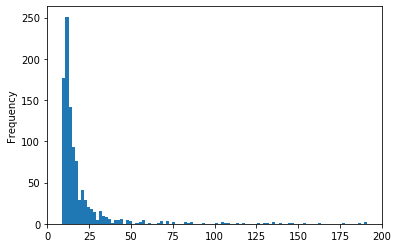

In [14]:
%matplotlib inline

swsf_graph = nx.powerlaw_cluster_graph(1000, 10, 0.5)
degree_sequence = sorted([d for n, d in swsf_graph.degree()], reverse=True)
degree_sequence = pd.Series(degree_sequence)

plt.figure()
degree_sequence.plot.hist(bins = 100)

The shape of the histogram closely resembles the power law with the raw distribution. The log-log scale of the degree distribution will n ow be examined to show a good fit for the line.

[]

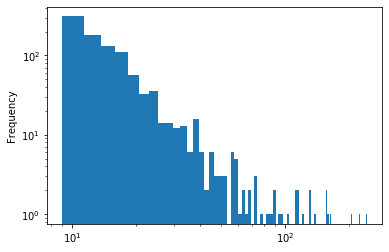

In [15]:
swsf_graph = nx.powerlaw_cluster_graph(1000, 10, 0.5)
degree_sequence = sorted([d for n, d in swsf_graph.degree()], reverse=True)
degree_sequence = pd.Series(degree_sequence)

plt.figure()
hist = degree_sequence.plot.hist(bins = 100)
plt.Axes.loglog(hist)

The shape of the log-log histogram shows that the data distribution roughly shows a linear shape. This is expected for degree distributions that follow the power law. This effectively shows that the distribution roughly follow the power law and that it has this property. For reference, the distribution for the scale-free network, which does have this property, is shown below.

[]

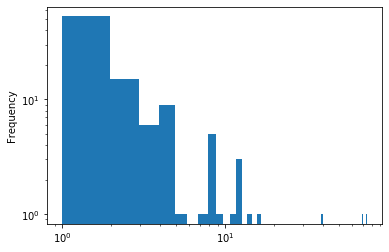

In [16]:
sf_graph = nx.scale_free_graph(100)
degree_sequence = sorted([d for n, d in sf_graph.degree()], reverse=True)
degree_sequence = pd.Series(degree_sequence)

plt.figure()
hist = degree_sequence.plot.hist(bins = 75)
plt.Axes.loglog(hist)

As you can see from above, the scale-free small-world graph follows this distribution closer than the scale-free graph which is depicted above.

<strong>Findings:</strong><br>
The powerlaw_cluster_graph embodies all of the qualities that is necessary for it to be a scale-free small world graph. It has all of the properties from both the scale-free network and the small-world network.

# Part 2: Centrality Correlations

In [17]:
import pandas as pd
import numpy as np
import networkx as nx

data = pd.read_csv("data.csv")
RND = data.loc[data['networkType'] == 'random']
SF = data.loc[data['networkType'] == 'scale-free']
SW = data.loc[data['networkType'] == 'small-world']
SFSW = data.loc[data['networkType'] == 'small-world/scale-free']

In [18]:
allP = data.corr(method ='pearson')
allS = data.corr(method='spearman')
allK = data.corr(method ='kendall')

rndP = RND.corr(method ='pearson')
rndS = RND.corr(method ='spearman')
rndK = RND.corr(method ='kendall')

sfP = SF.corr(method='pearson')
sfS = SF.corr(method='spearman')
sfK = SF.corr(method='kendall')

swP = SW.corr(method='pearson')
swS = SW.corr(method='spearman')
swK = SW.corr(method='kendall')

sfswP = SFSW.corr(method='pearson')
sfswS = SFSW.corr(method='spearman')
sfswK = SFSW.corr(method='kendall')

In [ ]:
allP.to_csv('pairwise/all-pearson.csv')
allS.to_csv('pairwise/all-spearman.csv')
allK.to_csv('pairwise/all-kendall.csv')

rndP.to_csv('pairwise/rnd-pearson.csv')
rndS.to_csv('pairwise/rnd-spearman.csv')
rndK.to_csv('pairwise/rnd-kendall.csv')

sfP.to_csv('pairwise/sf-pearson.csv')
sfS.to_csv('pairwise/sf-spearman.csv')
sfK.to_csv('pairwise/sf-kendall.csv')

swP.to_csv('pairwise/sw-pearson.csv')
swS.to_csv('pairwise/sw-spearman.csv')
swK.to_csv('pairwise/sw-kendall.csv')

In [ ]:
sfswP.to_csv('pairwise/sfsw-pearson.csv')
sfswS.to_csv('pairwise/sfsw-spearman.csv')
sfswK.to_csv('pairwise/sfsw-kendall.csv')

### Correlations Heatmap:

In [20]:
import pandas as pd
df = pd.read_csv('data.csv')

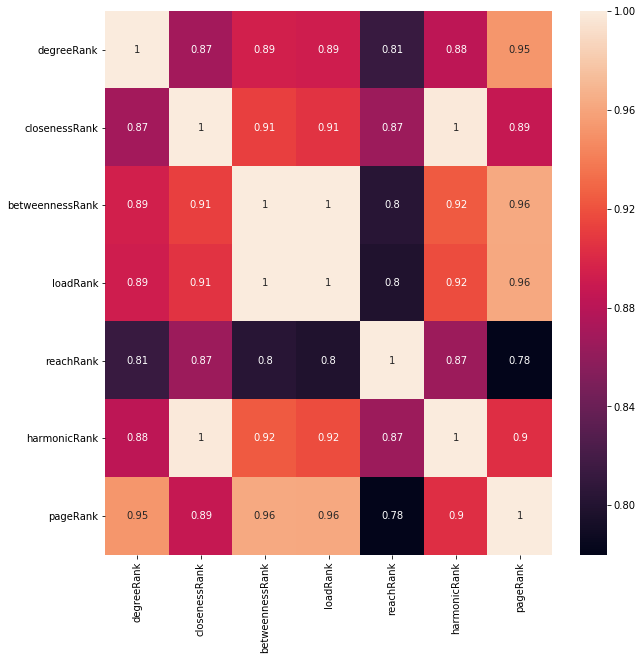

In [21]:
import seaborn as sns

df_corr = df.drop(['instanceNumber', 'nodeNumber', 'networkSize'], axis=1).corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_corr, xticklabels=df_corr.columns, yticklabels=df_corr.columns, annot=True, ax=ax)

### Correlation Heatmap Results:

|Centrality Types | Correlations |
|--------------|--------------|
|degreeRank|Strongly correlated with page|
|closenessRank|Perfectly correlated with harmonic, strongly with betweenness and load|
|betweennessRank|Perfectly correlated with load, strongly with page, harmonic, and closeness|
|loadRank|Perfectly correlated with betweenness, strongly with page, harmonic, and closeness|
|reachRank|No strong correlations, medium-strongly correlated with closeness and harmonic|
|harmonicRank|Perfectly correlated with closeness, strongly with betweenness, load, and page|
|pageRank|Strongly correlated with betweenness, load, degree, and harmonic|

## Part 3: Model Generation

### Create Class Outcome Columns:

In [ ]:
scale_free = df.loc[df['networkType'] == 'scale-free'] # add these new fields to the dataframe
small_world = df.loc[df['networkType'] == 'small-world']
random_data = df.loc[df['networkType'] == 'random']
small_world_scale_free = df.loc[df['networkType'] == 'small-world/scale-free']

In [ ]:
# this cell creates a new dictionary with the max ranking node for each network and centrality type
def namestr(obj, namespace):
    return [name for name in namespace if namespace[name] is obj]

dic={}
centralities = ['degree', 'closeness', 'betweenness', 'load', 'reach', 'harmonic', 'page']
networkTypes = ['scale-free', 'small-world', 'random', 'small-world/scale-free']
for network in networkTypes:
    dic[network]={}
    curNetwork=None
    if network=='scale-free':
        curNetwork=scale_free
    if network=='small-world':
        curNetwork=small_world
    if network=='random':
        curNetwork=random_data
    if network=='small-world/scale-free':
        curNetwork=small_world_scale_free

    for centrality in centralities:
        dic[network][centrality]=curNetwork.groupby(['networkSize','instanceNumber'])[centrality +'Rank'].max()

In [ ]:
degreeBinary = [] # create empty lists for adding binary values to dataframe
closenessBinary = []
betweennessBinary = []
loadBinary = []
reachBinary = []
harmonicBinary = []
pageBinary = []

for index, row in df.iterrows(): # iterate through all rows of dataframe
    
    if int(row['degreeRank']) <= int(dic[row['networkType']]['degree'][row['networkSize']][row['instanceNumber']]) / 4: 
        degreeBinary.append(1) # if the rank is in the top 25%, append 1 to binary list
    else:
        degreeBinary.append(0) # else, append a 0
        
    if int(row['closenessRank']) <= int(dic[row['networkType']]['closeness'][row['networkSize']][row['instanceNumber']]) / 4:
        closenessBinary.append(1)
    else:
        closenessBinary.append(0)
        
    if int(row['betweennessRank']) <= int(dic[row['networkType']]['betweenness'][row['networkSize']][row['instanceNumber']]) / 4:
        betweennessBinary.append(1)
    else:
        betweennessBinary.append(0)
        
    if int(row['loadRank']) <= int(dic[row['networkType']]['load'][row['networkSize']][row['instanceNumber']]) / 4:
        loadBinary.append(1)
    else:
        loadBinary.append(0)
        
    if int(row['reachRank']) <= int(dic[row['networkType']]['reach'][row['networkSize']][row['instanceNumber']]) / 4:
        reachBinary.append(1)
    else:
        reachBinary.append(0)
        
    if int(row['harmonicRank']) <= int(dic[row['networkType']]['harmonic'][row['networkSize']][row['instanceNumber']]) / 4:
        harmonicBinary.append(1)
    else:
        harmonicBinary.append(0)
        
    if int(row['pageRank']) <= int(dic[row['networkType']]['page'][row['networkSize']][row['instanceNumber']]) / 4:
        pageBinary.append(1)
    else:
        pageBinary.append(0)
        
df['degreeBinary'] = degreeBinary # append binary lists as columns to the end of the dataframe
df['closenessBinary'] = closenessBinary
df['betweennessBinary'] = betweennessBinary
df['loadBinary'] = loadBinary
df['reachBinary'] = reachBinary
df['harmonicBinary'] = harmonicBinary
df['pageBinary'] = pageBinary

In [ ]:
scale_free = df.loc[df['networkType'] == 'scale-free'] # recreate fresh dataframes after previous, sorting step
small_world = df.loc[df['networkType'] == 'small-world']
random_data = df.loc[df['networkType'] == 'random']
small_world_scale_free = df.loc[df['networkType'] == 'small-world/scale-free']

In [ ]:
df['reachBinary'].value_counts()

In [ ]:
# this is to output dataframe so we can start at this point every time we want to train a classifier
# it takes about 6 minutes on a standard 8-core redhawk node to get to this point in the code
df.to_csv('redhawk/binary_data.csv')

### Decision Tree Classifier on Redhawk:

In [ ]:
with open('decision_tree_status.txt', 'a') as outstatus:
    outstatus.write('Starting Decision Tree Classifier...\n')

import pandas as pd
df = pd.read_csv('binary_data.csv')

scale_free = df.loc[df['networkType'] == 'scale-free'] # recreate fresh dataframes after previous, sorting step
small_world = df.loc[df['networkType'] == 'small-world']
random_data = df.loc[df['networkType'] == 'random']
small_world_scale_free = df.loc[df['networkType'] == 'small-world/scale-free']

# start decision tree classifier job
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import random
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from multiprocessing import Process

# balance data and train models
networkTypes = [scale_free, small_world, random_data, small_world_scale_free]
networkNames = ['Scale-Free', 'Small-World', 'Random', 'Small-World/Scale-Free']
centralityTargets = ['degree', 'closeness','betweenness','load','reach','harmonic','page']
# We don't train models on reach,load,betweenness because all of them have nodes with ranks tied < 25%

def analyze_network(df, network_name):
    grid_params = {
        'max_depth': [2, 4, 6],
        'criterion': ["gini"], 
        'min_samples_leaf': [5]
    }

    for target in centralityTargets:
        # first, drop unneeded columns and the ranking of our target
        temp = df.copy().drop(['networkType', 'instanceNumber', 'nodeNumber', target + 'Rank'], axis=1)
        # then, drop all binary columns except for our target
        temp = temp.drop([x + 'Binary' for x in centralityTargets if x != target], axis=1)
        
        # divide data into training and testing sets
        temp_train, temp_test = train_test_split(temp, test_size = 0.2, random_state = 0)
        
        # balance the data
        num_zeros = temp_train[target + 'Binary'].value_counts()[0]
        num_ones = temp_train[target + 'Binary'].value_counts()[1]
        if num_zeros > num_ones: 
            # if num_ones is the minority, remove zeros to equal size
            # chop down zeros to size: num_ones
            chopping_block = random.sample(range(0, num_zeros), num_zeros - num_ones)
            temp_train = temp_train.drop(temp_train.index[chopping_block])

        else: 
            # if num_zeros is the minority, remove ones to equal size
            # chop down ones to size: num_zeros
            chopping_block = random.sample(range(0, num_ones), num_ones - num_zeros)
            temp_train = temp_train.drop(temp_train.index[chopping_block])
        

        # then, divide training data into 10 training and validation folds
        sum = 0
        folds = 10
        kf = KFold(n_splits=folds)
        for train, test in kf.split(temp_train):
            X_train = temp_train.iloc[train, 0:5].values
            y_train = temp_train.iloc[train, 5].values
            X_test = temp_train.iloc[test, 0:5].values
            y_test = temp_train.iloc[test, 5].values
            
            classifier = GridSearchCV(DecisionTreeClassifier(), grid_params)
            classifier.fit(X_train, y_train)
            print(classifier.best_params_)
            pred = classifier.predict(X_test)
            sum += accuracy_score(pred, y_test)
        print('\nAverage accuracy from ' + str(folds) + ' folds: ' + str(sum / folds))
        
        # then, train a model with all of the training data and test against the test data
        X_train = temp_train.iloc[:, 0:5].values
        y_train = temp_train.iloc[:, 5].values
        X_test = temp_test.iloc[:, 0:5].values
        y_test = temp_test.iloc[:, 5].values
    
        classifier = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
        classifier.fit(X_train, y_train)
        prediction = classifier.predict(X_test)
        
        print(classification_report(prediction, y_test))
        print('Example: The prediction of '+target+' based on the rank of other attributes as 800,26,8,8,8 is '+str(classifier.predict([[800,26,8,8,8]])))
        print('Total Accuracy: ' + str(accuracy_score(prediction, y_test)))
        with open('dt_results/' + network_name.replace('/','-'), 'a') as outstatus:
            outstatus.write(target + ' rank:\n')
            outstatus.write('\tTotal Accuracy: ' + str(accuracy_score(prediction, y_test)) + '\n')
            outstatus.write('\tExample: The prediction of '+target+' based on the rank of other attributes as 800,26,8,8,8 is '+str(classifier.predict([[800,26,8,8,8]])) + '\n')

nameIndex = -1
processes = [x for x in range(len(networkTypes))]
for df in networkTypes:
    with open('dt_results/' + str(networkNames[nameIndex].replace('/','-')), 'w') as clearfile:
        pass
    nameIndex += 1
    processes[nameIndex] = Process(target=analyze_network, args=(df, networkNames[nameIndex]))
    processes[nameIndex].start()
for i in range(len(processes)):
    processes[i].join()
    with open('decision_tree_status.txt', 'a') as outstatus:
        outstatus.write(str(i+1) + '/' + str(len(networkNames)) + ' networks completed.\n')

with open('decision_tree_status.txt', 'a') as outstatus:
    outstatus.write('Finished!\n')

### Random Forest Classifier on Redhawk:

In [ ]:
with open('random_forest_status.txt', 'a') as outstatus:
    outstatus.write('Starting Random Forest Classifier...\n')

import pandas as pd
df = pd.read_csv('binary_data.csv')

scale_free = df.loc[df['networkType'] == 'scale-free'] # recreate fresh dataframes after previous, sorting step
small_world = df.loc[df['networkType'] == 'small-world']
random_data = df.loc[df['networkType'] == 'random']
small_world_scale_free = df.loc[df['networkType'] == 'small-world/scale-free']

# start random forest classifier job
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import random
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from multiprocessing import Process

# balance data and train models
networkTypes = [scale_free, small_world, random_data, small_world_scale_free]
networkNames = ['Scale-Free', 'Small-World', 'Random', 'Small-World/Scale-Free']
centralityTargets = ['degree', 'closeness','betweenness','load','reach','harmonic','page']
# We don't train models on reach,load,betweenness because all of them have nodes with ranks tied < 25%

def analyze_network(df, network_name):
    grid_params = {'n_estimators': [20, 40, 60]}

    for target in centralityTargets:
        # first, drop unneeded columns and the ranking of our target
        temp = df.copy().drop(['networkType', 'instanceNumber', 'nodeNumber', target + 'Rank'], axis=1)
        # then, drop all binary columns except for our target
        temp = temp.drop([x + 'Binary' for x in centralityTargets if x != target], axis=1)
        
        # divide data into training and testing sets
        temp_train, temp_test = train_test_split(temp, test_size = 0.2, random_state = 0)
        
        # balance the data
        num_zeros = temp_train[target + 'Binary'].value_counts()[0]
        num_ones = temp_train[target + 'Binary'].value_counts()[1]
        if num_zeros > num_ones: 
            # if num_ones is the minority, remove zeros to equal size
            # chop down zeros to size: num_ones
            chopping_block = random.sample(range(0, num_zeros), num_zeros - num_ones)
            temp_train = temp_train.drop(temp_train.index[chopping_block])

        else: 
            # if num_zeros is the minority, remove ones to equal size
            # chop down ones to size: num_zeros
            chopping_block = random.sample(range(0, num_ones), num_ones - num_zeros)
            temp_train = temp_train.drop(temp_train.index[chopping_block])
        

        # then, divide training data into 10 training and validation folds
        sum = 0
        folds = 10
        kf = KFold(n_splits=folds)
        for train, test in kf.split(temp_train):
            X_train = temp_train.iloc[train, 0:5].values
            y_train = temp_train.iloc[train, 5].values
            X_test = temp_train.iloc[test, 0:5].values
            y_test = temp_train.iloc[test, 5].values
            
            classifier = GridSearchCV(RandomForestClassifier(), grid_params)
            classifier.fit(X_train, y_train)
            print(classifier.best_params_)
            pred = classifier.predict(X_test)
            sum += accuracy_score(pred, y_test)
        print('\nAverage accuracy from ' + str(folds) + ' folds: ' + str(sum / folds))
        
        # then, train a model with all of the training data and test against the test data
        X_train = temp_train.iloc[:, 0:5].values
        y_train = temp_train.iloc[:, 5].values
        X_test = temp_test.iloc[:, 0:5].values
        y_test = temp_test.iloc[:, 5].values
    
        classifier = RandomForestClassifier(n_estimators=40)
        classifier.fit(X_train, y_train)
        prediction = classifier.predict(X_test)
        
        print(classification_report(prediction, y_test))
        print('Example: The prediction of '+target+' based on the rank of other attributes as 800,26,8,8,8 is '+str(classifier.predict([[800,26,8,8,8]])))
        print('Total Accuracy: ' + str(accuracy_score(prediction, y_test)))
        with open('rf_results/' + network_name.replace('/','-'), 'a') as outstatus:
            outstatus.write(target + ' rank:\n')
            outstatus.write('\tTotal Accuracy: ' + str(accuracy_score(prediction, y_test)) + '\n')
            outstatus.write('\tExample: The prediction of '+target+' based on the rank of other attributes as 800,26,8,8,8 is '+str(classifier.predict([[800,26,8,8,8]])) + '\n')

nameIndex = -1
processes = [x for x in range(len(networkTypes))]
for df in networkTypes:
    with open('rf_results/' + str(networkNames[nameIndex].replace('/','-')), 'w') as clearfile:
        pass
    nameIndex += 1
    processes[nameIndex] = Process(target=analyze_network, args=(df, networkNames[nameIndex]))
    processes[nameIndex].start()
for i in range(len(processes)):
    processes[i].join()
    with open('random_forest_status.txt', 'a') as outstatus:
        outstatus.write(str(i+1) + '/' + str(len(networkNames)) + ' networks completed.\n')

with open('random_forest_status.txt', 'a') as outstatus:
    outstatus.write('Finished!\n')

### Naive Bayes Classifier on Redhawk:

In [ ]:
with open('naive_bayes_status.txt', 'a') as outstatus:
    outstatus.write('Starting Naive Bayes Classifier...\n')

import pandas as pd
df = pd.read_csv('binary_data.csv')

scale_free = df.loc[df['networkType'] == 'scale-free'] # recreate fresh dataframes after previous, sorting step
small_world = df.loc[df['networkType'] == 'small-world']
random_data = df.loc[df['networkType'] == 'random']
small_world_scale_free = df.loc[df['networkType'] == 'small-world/scale-free']

# start naive bayes classifier job
from sklearn.naive_bayes import BernoulliNB
from sklearn import tree
import random
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from multiprocessing import Process

# balance data and train models
networkTypes = [scale_free, small_world, random_data, small_world_scale_free]
networkNames = ['Scale-Free', 'Small-World', 'Random', 'Small-World/Scale-Free']
centralityTargets = ['degree', 'closeness','betweenness','load','reach','harmonic','page']
# We don't train models on reach,load,betweenness because all of them have nodes with ranks tied < 25%

def analyze_network(df, network_name):
    grid_params = {'alpha': [.80, 1.0]}

    for target in centralityTargets:
        # first, drop unneeded columns and the ranking of our target
        temp = df.copy().drop(['networkType', 'instanceNumber', 'nodeNumber', target + 'Rank'], axis=1)
        # then, drop all binary columns except for our target
        temp = temp.drop([x + 'Binary' for x in centralityTargets if x != target], axis=1)
        
        # divide data into training and testing sets
        temp_train, temp_test = train_test_split(temp, test_size = 0.2, random_state = 0)
        
        # balance the data
        num_zeros = temp_train[target + 'Binary'].value_counts()[0]
        num_ones = temp_train[target + 'Binary'].value_counts()[1]
        if num_zeros > num_ones: 
            # if num_ones is the minority, remove zeros to equal size
            # chop down zeros to size: num_ones
            chopping_block = random.sample(range(0, num_zeros), num_zeros - num_ones)
            temp_train = temp_train.drop(temp_train.index[chopping_block])

        else: 
            # if num_zeros is the minority, remove ones to equal size
            # chop down ones to size: num_zeros
            chopping_block = random.sample(range(0, num_ones), num_ones - num_zeros)
            temp_train = temp_train.drop(temp_train.index[chopping_block])
        

        # then, divide training data into 10 training and validation folds
        sum = 0
        folds = 10
        kf = KFold(n_splits=folds)
        for train, test in kf.split(temp_train):
            X_train = temp_train.iloc[train, 0:5].values
            y_train = temp_train.iloc[train, 5].values
            X_test = temp_train.iloc[test, 0:5].values
            y_test = temp_train.iloc[test, 5].values
            
            classifier = GridSearchCV(BernoulliNB(), grid_params)
            classifier.fit(X_train, y_train)
            print(classifier.best_params_)
            pred = classifier.predict(X_test)
            sum += accuracy_score(pred, y_test)
        print('\nAverage accuracy from ' + str(folds) + ' folds: ' + str(sum / folds))
        
        # then, train a model with all of the training data and test against the test data
        X_train = temp_train.iloc[:, 0:5].values
        y_train = temp_train.iloc[:, 5].values
        X_test = temp_test.iloc[:, 0:5].values
        y_test = temp_test.iloc[:, 5].values
    
        classifier = BernoulliNB(alpha=1.0)
        classifier.fit(X_train, y_train)
        prediction = classifier.predict(X_test)
        
        print(classification_report(prediction, y_test))
        print('Example: The prediction of '+target+' based on the rank of other attributes as 800,26,8,8,8 is '+str(classifier.predict([[800,26,8,8,8]])))
        print('Total Accuracy: ' + str(accuracy_score(prediction, y_test)))
        with open('nb_results/' + network_name.replace('/','-'), 'a') as outstatus:
            outstatus.write(target + ' rank:\n')
            outstatus.write('\tTotal Accuracy: ' + str(accuracy_score(prediction, y_test)) + '\n')
            outstatus.write('\tExample: The prediction of '+target+' based on the rank of other attributes as 800,26,8,8,8 is '+str(classifier.predict([[800,26,8,8,8]])) + '\n')

nameIndex = -1
processes = [x for x in range(len(networkTypes))]
for df in networkTypes:
    with open('nb_results/' + str(networkNames[nameIndex].replace('/','-')), 'w') as clearfile:
        pass
    nameIndex += 1
    processes[nameIndex] = Process(target=analyze_network, args=(df, networkNames[nameIndex]))
    processes[nameIndex].start()
for i in range(len(processes)):
    processes[i].join()
    with open('naive_bayes_status.txt', 'a') as outstatus:
        outstatus.write(str(i+1) + '/' + str(len(networkNames)) + ' networks completed.\n')

with open('naive_bayes_status.txt', 'a') as outstatus:
    outstatus.write('Finished!\n')